<a href="https://colab.research.google.com/github/iskra3138/GluonTS/blob/master/1.2.%20GluonTS_Intro_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet-cu101

     |████████████████████████████████| 710.5MB 23kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
!pip install pydantic==1.4

     |████████████████████████████████| 7.5MB 2.5MB/s 


In [3]:
!pip install gluonts

     |████████████████████████████████| 327kB 2.7MB/s 
     |████████████████████████████████| 10.4MB 7.5MB/s 
     |████████████████████████████████| 194kB 49.5MB/s 
     |████████████████████████████████| 235kB 42.7MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68018 sha256=5ac65f61bbda8687aa32f12138fe1b55286c4e1181712098b1865c0777c5a3b8
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Succes

INFO:root:Using CPU
INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:numexpr.utils:NumExpr defaulting to 2 threads.


learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 26844
100%|██████████| 50/50 [00:06<00:00,  8.14it/s, avg_epoch_loss=4.43]
INFO:root:Epoch[0] Elapsed time 6.153 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.432839
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  8.00it/s, avg_epoch_loss=4.11]
INFO:root:Epoch[1] Elapsed time 6.254 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.107540
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.37it/s, avg_epoch_loss=4.06]
INFO:root:Epoch[2] Elapsed time 5.978 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.058132
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:06<00:00,  8.31it/s, avg_epoch_loss=4.01]
INFO:root:Epoch[3] Elapsed time 6.022 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.009403
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.36it/s, avg_epoch_loss=4.01]
INFO

[52.78894  53.847687 47.62246  49.96671  48.53075  48.242115 44.88496
 47.47166  48.378414 45.306973 49.19626  45.928577]


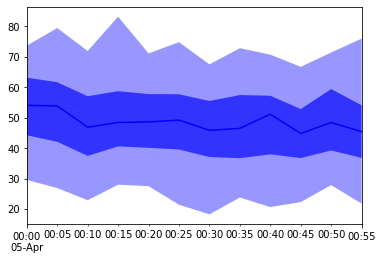

In [1]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer

import pandas as pd

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
data = common.ListDataset([{"start": df.index[0],
                            "target": df.value[:"2015-04-05 00:00:00"]}],
                          freq="5min")

trainer = Trainer(epochs=10)
estimator = deepar.DeepAREstimator(freq="5min", prediction_length=12, trainer=trainer)
predictor = estimator.train(training_data=data)

prediction = next(predictor.predict(data))
print(prediction.mean)
prediction.plot(output_file='graph.png')